In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

In [41]:
# Load the dataset
data = pd.read_csv("adult.csv")

In [42]:
# Select the specified columns for K-Means clustering
selected_columns = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
X = data[selected_columns]

In [43]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Specify n_init=10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

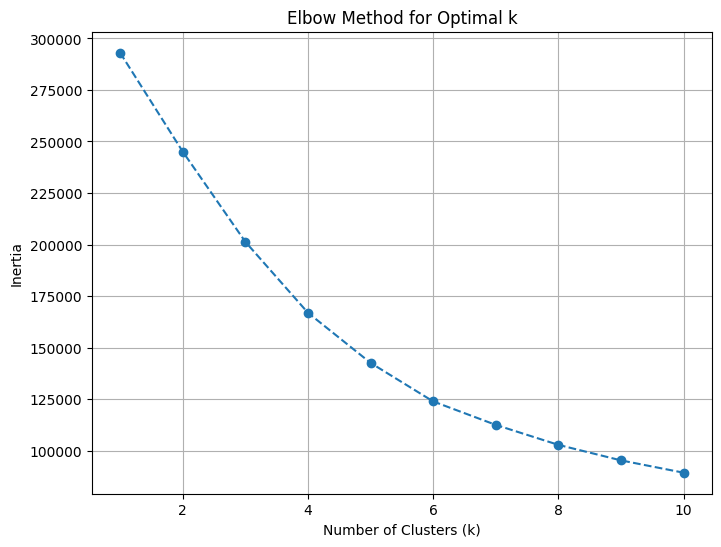

In [45]:
# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [46]:
# Calculate silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

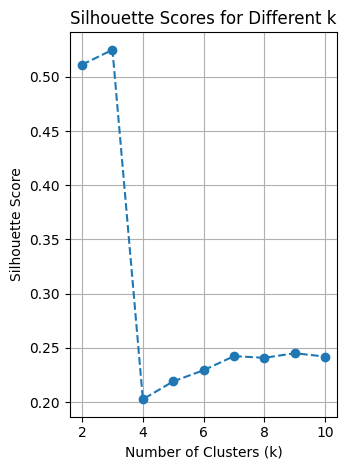

In [47]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# Based on the Elbow method or silhouette scores, select an appropriate value of k (number of clusters)

In [49]:
# Perform K-Means clustering with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Specify n_init=10
data["cluster"] = kmeans.fit_predict(X_scaled)

In [50]:
# Visualize the cluster distribution
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data["pca1"] = X_pca[:, 0]
data["pca2"] = X_pca[:, 1]

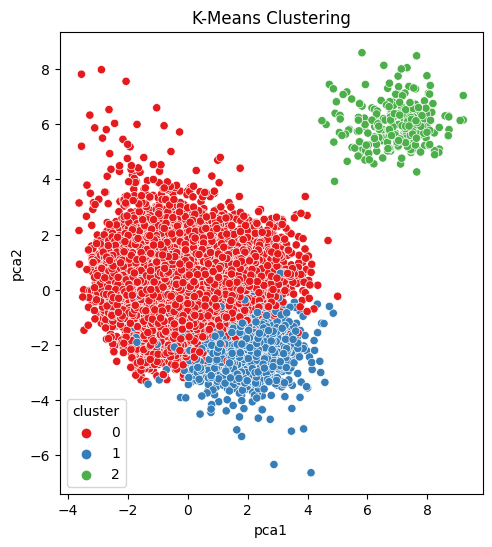

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=data, palette="Set1")
plt.title("K-Means Clustering")
plt.show()

Text(0.5, 1.0, 'Cluster Centers')

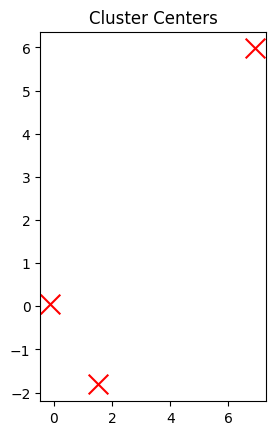

In [52]:
# Plot cluster centers in PCA space
plt.subplot(1, 2, 2)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', c='red', s=200)
plt.title("Cluster Centers")

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [54]:
# Display cluster sizes
cluster_sizes = data["cluster"].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
cluster
0    46360
1     2238
2      244
Name: count, dtype: int64
